# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Цель исследования** — построить модель для определения стоимость, которая будет соответствовать критериям заказчика.

**Ход исследования:**
1. Изучить общую информацию датафрейма
2. Выполнить предобработку данных
3. Подготовить данные для дальнейшей работы
4. Обучить различные модели, определить их качество предсказания, скорость предсказания и время обучения
5. Проанализировать модели и выбрать одну наиболее подходящую из них
6. Проверить лучшую модель на тестовой выборке

## Изучение общей информации

### Импорт необходимых библиотек

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings(action='ignore')

C:\Users\150ho\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\150ho\anaconda3\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


### Открытие файла

In [3]:
data = pd.read_csv('autos.csv', engine='python')

### Вывод первых десяти строк таблицы

In [4]:
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


### Вывод основной информации о датафрейме

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


### Вывод

Согласно документации к данным:
* `DateCrawled` — дата скачивания анкеты из базы
* `VehicleType` — тип автомобильного кузова
* `RegistrationYear` — год регистрации автомобиля
* `Gearbox` — тип коробки передач
* `Power` — мощность (л. с.)
* `Model` — модель автомобиля
* `Kilometer` — пробег (км)
* `RegistrationMonth` — месяц регистрации автомобиля
* `FuelType` — тип топлива
* `Brand` — марка автомобиля
* `Repaired` — была машина в ремонте или нет
* `DateCreated` — дата создания анкеты
* `NumberOfPictures` — количество фотографий автомобиля
* `PostalCode` — почтовый индекс владельца анкеты (пользователя)
* `LastSeen` — дата последней активности пользователя

Целевым признаков будет являться столбец `Price`. Из всех остальных столбцов нужно удалить незначительные признаки.

В датафрейме имеются пропуски, а также замечены аномальные значения, например, в столбце `Price` имеются нулевые значения. Поэтому необходимо выполнить предобработку данных, а затем перейти к их подготовке для обучения моделей.

## Предобработка данных

### Изменение названий столбцов датафрейма

Чтобы с названиями столбцов было удобнее работать, перепишем их в змеином регистре:

In [7]:
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [8]:
# data.columns = data.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]

In [9]:
data.columns = data.columns.str.lower()

Проверим, что все названия столбцов изменились:

In [10]:
data.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'kilometer', 'registrationmonth', 'fueltype', 'brand',
       'repaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [11]:
### Удаление неинформативных признаков

Такие признаки, как дата скачивания анкеты из базы, дата создания анкеты, месяц регистрации автомобиля, количество фотографий автомобиля, почтовый индекс владельца анкеты и дата последней активности пользователя никак не влияют на ценообразование, поэтому их необходимо удалить:

In [12]:
data

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [13]:
data = data.drop(['datecrawled', 'registrationmonth', 'datecreated', 
                  'numberofpictures', 'postalcode', 'lastseen'], axis=1)

In [14]:
###  Обработка аномальных значений

В первом пункте исследования были замечены аномальные значения у целевого признака. Цена никак не может быть меньше тысячи евро. Рассмотрим гистограмму:

<AxesSubplot:>

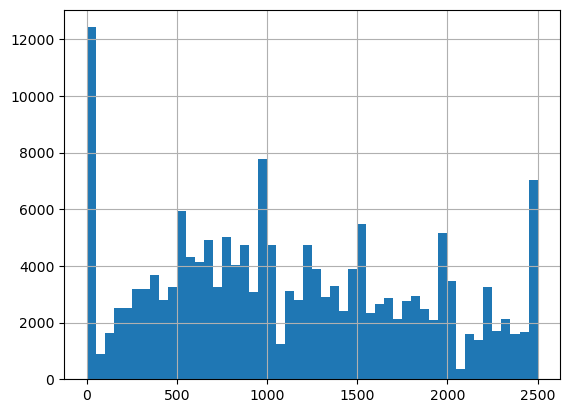

In [15]:
data['price'].hist(bins=50, range=(0,2500))

Так как цена - это целевой признак, строки с аномальными ценами стоит удалить:

In [16]:
data = data.loc[(data['price'] > 1000)]

Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я все-таки склоняюсь к тому, чтобы избавиться от таких данных.

Аномальные значения были также замечены и в столбце с мощностью. Мощность меньше 20 лошадиных сил вызывает вопросы. Рассмотрим гистограмму:

<AxesSubplot:>

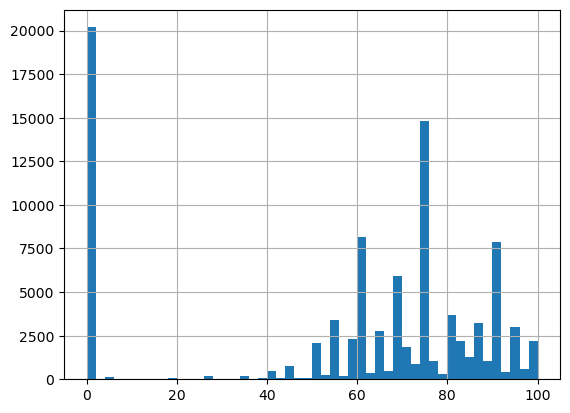

In [17]:
data['power'].hist(bins=50, range=(0,100))

Заменим аномальные значения на значение-заглушку -1, так как заполнить их целесообразно не представляется возможным:

In [18]:
data.loc[(data['power'] < 20), 'power'] = -1

В столбце с годом регистрации автомобиля присутствуют аномальные минимальные и максимальные значения.

In [19]:
data = data.loc[data['registrationyear'] < 2023]

In [20]:
data = data.loc[data['registrationyear'] > 1900]

### Заполнение пропусков

Проверим количество пропусков в каждом столбце:

In [21]:
data.isna().sum()

price                   0
vehicletype         19505
registrationyear        0
gearbox              9779
power                   0
model               11002
kilometer               0
fueltype            16587
brand                   0
repaired            40482
dtype: int64

Точно заполнить пропуски для данных столбцов невозможно, поэтому заменим их на 'unknown'.

In [22]:
data['vehicletype'] = data['vehicletype'].fillna('unknown')

In [23]:
data['gearbox'] = data['gearbox'].fillna('unknown')

In [24]:
data['model'] = data['model'].fillna('unknown')

In [25]:
data['fueltype'] = data['fueltype'].fillna('unknown')

In [26]:
data['repaired'] = data['repaired'].fillna('unknown')

Проверим, все ли пропуски были заполнены:

In [27]:
data.isna().sum()

price               0
vehicletype         0
registrationyear    0
gearbox             0
power               0
model               0
kilometer           0
fueltype            0
brand               0
repaired            0
dtype: int64

### Вывод

В данном разделе была произведена предобработка данных: названия столбцов были переписаны в змеином регистре, неинформативные признаки были удалены, объекты с аномальными значениями были удалены, аномальные значения признаков были заменены, а также пропущенные значения были заполнены с помощью значений-заглушек, .

In [30]:
data = data.drop_duplicates()

## Подготовка данных

### Разбиение данных на целевой признак и признаки

In [31]:
features = data.drop(['price'], axis=1)
target = data['price']

### Разбиение данных на выборки

Разобьем данные на обучающую, валидационную и тестовую выборку в отношении 3:1:1:

In [32]:
features_train, features_sep, target_train, target_sep = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_sep, target_sep, test_size=0.5, random_state=12345)

In [33]:
features_train.shape #обучающая выборка

(139897, 9)

In [34]:
features_valid.shape #валидационная выборка

(46632, 9)

In [35]:
features_test.shape #тестовая выборка

(46633, 9)

### Преобразование категориальных признаков в численные

#### Для линейной регрессии

Для линейной регрессии используем `OneHotEncoder`:

In [36]:
reg_features_train = features_train.copy()
reg_features_valid = features_valid.copy()
reg_features_test = features_test.copy()

In [37]:
feature_name = features_train.select_dtypes(include='object').columns.to_list()

In [38]:
feature_name

['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'repaired']

In [39]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder.fit(features_train[feature_name])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
              sparse_output=False)

In [40]:
reg_features_train[
    encoder.get_feature_names_out()
] = encoder.transform(reg_features_train[feature_name])
reg_features_train = reg_features_train.drop(feature_name, axis=1)

In [41]:
reg_features_valid[
    encoder.get_feature_names_out()
] = encoder.transform(reg_features_valid[feature_name])
reg_features_valid = reg_features_valid.drop(feature_name, axis=1)

In [42]:
reg_features_test[
    encoder.get_feature_names_out()
] = encoder.transform(reg_features_test[feature_name])
reg_features_test = reg_features_test.drop(feature_name, axis=1)

#### Для случайного леса и бустинга

Для случайного леса и бустинга используем `OrdinalEncoder`:

In [43]:
ordinal_features_train = features_train.copy()
ordinal_features_valid = features_valid.copy()
ordinal_features_test = features_test.copy()

In [44]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ordinal_encoder.fit(ordinal_features_train[feature_name])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [45]:
ordinal_features_train[feature_name] = ordinal_encoder.transform(ordinal_features_train[feature_name])

In [46]:
ordinal_features_valid[feature_name] = ordinal_encoder.transform(ordinal_features_valid[feature_name])

In [47]:
ordinal_features_test[feature_name] = ordinal_encoder.transform(ordinal_features_test[feature_name])

### Вывод

Для последующего обучения моделей данные были разбиты на целевой признак и признаки, данные были разделены на обучающую, валидационную и тестовую выборки, а затем категориальные признаки преобразованы в численные.

## Обучение моделей

Рассмотрим три модели: LightGBM, случайный лес и линейную регрессию. Оценим время, затраченное на обучение, предсказание, а также качество моделей с помощью метрики RMSE.

### LightGBM

С помощью кросс-валидации найдем параметры, при которых RMSE метрика модели будет наименьшей, и сохраним лучшую модель:

In [48]:
light_regressor = lgb.LGBMRegressor(random_state=12345)

params = {'n_estimators' : range(10, 20, 1),
             'max_depth' : range(10, 20, 1)}

grid = RandomizedSearchCV(light_regressor, params, scoring='neg_root_mean_squared_error')
grid.fit(ordinal_features_train, target_train)

light_regressor = grid.best_estimator_

print(light_regressor)

LGBMRegressor(max_depth=14, n_estimators=19, random_state=12345)


Обучим лучшую модель и измерим затраченное на обучение время:

In [49]:
%%time
light_regressor.fit(ordinal_features_train, target_train)

CPU times: total: 1.39 s
Wall time: 192 ms


LGBMRegressor(max_depth=14, n_estimators=19, random_state=12345)

Сделаем предсказания и измерим его скорость:

In [50]:
%%time
light_predictions = light_regressor.predict(ordinal_features_valid)

CPU times: total: 219 ms
Wall time: 32 ms


Проверим метрику RMSE модели на валидационной выборке:

In [51]:
print(mean_squared_error(target_valid, light_predictions, squared=False))

2335.870188993113


### Случайный лес

Повторим предыдущие шаги по аналогии с LightGBM:

In [52]:
forest_model = RandomForestRegressor(random_state=12345)

params = {'n_estimators' : range(10, 20, 1),
             'max_depth' : range(10, 20, 1)}

grid = RandomizedSearchCV(forest_model, params, scoring='neg_root_mean_squared_error', n_iter=5, n_jobs=-1)
grid.fit(ordinal_features_train, target_train)

forest_model = grid.best_estimator_

print(forest_model)

RandomForestRegressor(max_depth=18, n_estimators=14, random_state=12345)


In [53]:
%%time
forest_model.fit(ordinal_features_train, target_train)

CPU times: total: 10.4 s
Wall time: 10.4 s


RandomForestRegressor(max_depth=18, n_estimators=14, random_state=12345)

In [54]:
%%time
forest_predictions = forest_model.predict(ordinal_features_valid)

CPU times: total: 203 ms
Wall time: 185 ms


In [55]:
print(mean_squared_error(target_valid, forest_predictions, squared=False))

1879.905390323392


### Линейная регрессия

Повторим предыдущие шаги по аналогии с LightGBM:

In [56]:
model_reg = LinearRegression()

params = {'n_jobs' : range(1, 10, 1)}

grid = RandomizedSearchCV(model_reg, params, scoring='neg_root_mean_squared_error', n_iter=5, n_jobs=-1)
grid.fit(reg_features_train, target_train)

model_reg = grid.best_estimator_

print(model_reg)

LinearRegression(n_jobs=7)


In [57]:
%%time
model_reg.fit(reg_features_train, target_train)

CPU times: total: 8.33 s
Wall time: 2.38 s


LinearRegression(n_jobs=7)

In [58]:
%%time
reg_predictions = model_reg.predict(reg_features_valid)

CPU times: total: 312 ms
Wall time: 85 ms


In [59]:
print(mean_squared_error(target_valid, reg_predictions, squared=False))

3013.7564865507443


## Анализ моделей

По времени обучения лидирует модель LightGBM, за ней идет модель линейной регрессии. Больше всего времени на обучение затратила модель случайного леса. 

По времени предсказания первая модель — это модель LightGBM. Второй после нее идет модель линейной регрессии.

Наименьшее значение метрики RMSE у модели случайного леса, но по всем остальным показателям она хуже.

Таким образом, лучшей моделью по всем трем параметрам является модель LightGBM. Проверим ее метрику RMSE на тестовой выборке:

In [60]:
print(mean_squared_error(target_test, light_regressor.predict(ordinal_features_test), squared=False))

2348.3149528264657


## Вывод

Данные датафрейма были изучены и подготовлены к работе с моделями. На этапе изучения были замечены пропущенные и аномальные значения, вследствие чего была необходима преобработка данных.

На этапе предобработки неинформативные для обучения моделей признаки были удалены, аномальные значения обработаны, а пропуски заполнены.

Для успешного обучения моделей на этапе подготовки данных данные были разбиты на целевой признак и признаки, а затем — на обучающую, валидационную и тестовую выборки, после чего было необходимо преобразовать категориальные признаки в численные с помощью `OneHotEncoder`.

Для выбора лучшей модели были обучены следующие модели: модель LightGBM, модель случайного леса и модель линейной регрессии. Для всех моделей были выбраны лучшие параметры с помощью кросс-валидации, а затем модели были проверены по критериям заказчика: по качеству предсказания, по скорости предсказания и по времени обучения. 

Лучшей по критериям моделью оказалась модель LightGBM, ее метрика RMSE на тестовой выборке составила около 2348.